In [116]:
import sys
sys.path.append('/home/dell/miniconda3/envs/VBOF/lib/python3.8/site-packages')
sys.path.append('/media/dell/0E54E2B554E29EA9/HanRunpeng/HIV-VBOF/')
import cobra
import numpy as np
from VBOFKit import analysis
import gurobipy as grb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [117]:
solver = 'gurobi'

In [118]:
optimized_flux_host = []
optimized_flux_virus = []
single_gene_ko = []
single_reaction_ko = []

# Comparison and Single-gene/reaction KO

Naive CD4T

In [119]:
tn_model = cobra.io.read_sbml_model('models/host-virus-model/NaiveT.hvm.xml')

In [120]:
(tn_hostF,tn_hostX,tn_virusF,tn_virusX) = analysis.Optimize(tn_model, VirusRxn=-1,HostRxn=-2,
                                                            solver=solver)
optimized_flux_host.append(tn_hostF)
optimized_flux_virus.append(tn_virusF)

In [47]:
tn_model_remove_obj = tn_model.copy()
tn_model_remove_obj.remove_reactions([tn_model.reactions[-2].id])
hvmComp_tn,regulation_tn,hostXd_tn,virusXd_tn = analysis.Compare(HVM_remove_obj=tn_model_remove_obj,
                                                                 objIdx=-2, hostX=tn_hostX, virusX=tn_virusX)

Read LP format model from file /tmp/tmpy7azps58.lp
Reading time = 0.03 seconds
: 3153 rows, 10360 columns, 38910 nonzeros


In [48]:
tn_single_gene_ko, tn_single_reaction_ko = analysis.Knockout(tn_model, -2, -1, solver)

T Helper 1

In [121]:
th1_model = cobra.io.read_sbml_model('models/host-virus-model/Th1.hvm.xml')

In [122]:
(th1_hostF,th1_hostX,th1_virusF,th1_virusX) = analysis.Optimize(th1_model, VirusRxn=-1,HostRxn=-4,
                                                            solver=solver)
optimized_flux_host.append(th1_hostF)
optimized_flux_virus.append(th1_virusF)

In [51]:
th1_model_remove_obj = th1_model.copy()
th1_model_remove_obj.remove_reactions([th1_model.reactions[-4].id])
hvmComp_th1,regulation_th1,hostXd_th1,virusXd_th1 = analysis.Compare(HVM_remove_obj=th1_model_remove_obj,
                                                                 objIdx=-4, hostX=th1_hostX, virusX=th1_virusX)

Read LP format model from file /tmp/tmp410xwaq0.lp
Reading time = 0.02 seconds
: 2517 rows, 7914 columns, 27902 nonzeros


In [52]:
th1_single_gene_ko, th1_single_reaction_ko = analysis.Knockout(th1_model, -4, -1, solver)

T Helper 2

In [123]:
th2_model = cobra.io.read_sbml_model('models/host-virus-model/Th2.hvm.xml')

In [124]:
(th2_hostF,th2_hostX,th2_virusF,th2_virusX) = analysis.Optimize(th2_model, VirusRxn=-1,HostRxn=-4,
                                                            solver=solver)
optimized_flux_host.append(th2_hostF)
optimized_flux_virus.append(th2_virusF)

In [55]:
th2_model_remove_obj = th2_model.copy()
th2_model_remove_obj.remove_reactions([th2_model.reactions[-4].id])
hvmComp_th2,regulation_th2,hostXd_th2,virusXd_th2 = analysis.Compare(HVM_remove_obj=th2_model_remove_obj,
                                                                 objIdx=-4, hostX=th2_hostX, virusX=th2_virusX)

Read LP format model from file /tmp/tmpdxfuuv7f.lp
Reading time = 0.05 seconds
: 3156 rows, 10506 columns, 39670 nonzeros


In [56]:
th2_single_gene_ko, th2_single_reaction_ko = analysis.Knockout(th2_model, -4, -1, solver)

T Helper 17

In [125]:
th17_model = cobra.io.read_sbml_model('models/host-virus-model/Th17.hvm.xml')

In [126]:
(th17_hostF,th17_hostX,th17_virusF,th17_virusX) = analysis.Optimize(th17_model, VirusRxn=-1,HostRxn=-4,
                                                            solver=solver)
optimized_flux_host.append(th17_hostF)
optimized_flux_virus.append(th17_virusF)

In [59]:
th17_model_remove_obj = th17_model.copy()
th17_model_remove_obj.remove_reactions([th17_model.reactions[-4].id])
hvmComp_th17,regulation_th17,hostXd_th17,virusXd_th17 = analysis.Compare(HVM_remove_obj=th17_model_remove_obj,
                                                                 objIdx=-4, hostX=th17_hostX, virusX=th17_virusX)

Read LP format model from file /tmp/tmpg_73c_u2.lp
Reading time = 0.03 seconds
: 3263 rows, 10566 columns, 38152 nonzeros


In [60]:
th17_single_gene_ko, th17_single_reaction_ko = analysis.Knockout(th17_model, -4, -1, solver)

# FVA Enforcement

In [71]:
fraction_of_optimum= 0.80

In [72]:
enfvirus_tn = analysis.FVAEnforce(HVM=tn_model, virusIdx=-1, hostIdx=-2, fraction_of_optimum=fraction_of_optimum,
                                  virus_optimum=tn_virusF)

In [73]:
enfvirus_th1 = analysis.FVAEnforce(HVM=th1_model, virusIdx=-1, hostIdx=-2, fraction_of_optimum=fraction_of_optimum,
                                  virus_optimum=th1_virusF)

/home/dell/miniconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


In [74]:
enfvirus_th2 = analysis.FVAEnforce(HVM=th2_model, virusIdx=-1, hostIdx=-2, fraction_of_optimum=fraction_of_optimum,
                                  virus_optimum=th2_virusF)

In [75]:
enfvirus_th17 = analysis.FVAEnforce(HVM=th17_model, virusIdx=-1, hostIdx=-2, fraction_of_optimum=fraction_of_optimum,
                                  virus_optimum=th17_virusF)

# PCA analysis

In [31]:
intersected_reactions = reduce(np.intersect1d, [tn_virusX.index, 
                                                    th1_virusX.index, 
                                                    th2_virusX.index, 
                                                    th17_virusX.index])

In [78]:
flux_df = pd.DataFrame(np.array([
              np.nan_to_num(tn_virusX[intersected_reactions].values), 
              np.nan_to_num(th1_virusX[intersected_reactions].values),
              np.nan_to_num(th2_virusX[intersected_reactions].values),
              np.nan_to_num(th17_virusX[intersected_reactions].values),
              np.nan_to_num(tn_hostX[intersected_reactions].values),
              np.nan_to_num(th1_hostX[intersected_reactions].values),
              np.nan_to_num(th2_hostX[intersected_reactions].values),
              np.nan_to_num(th17_hostX[intersected_reactions].values)]))

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [80]:
pca_result = pd.DataFrame(pca.fit_transform(flux_df), columns=['PC1','PC2'])
pca_result['Cell type'] = ['Tn', 'Th1', 'Th2', 'Th17']*2
pca_result['State'] = ['Virus optima']*4 + ['Host optima']*4

In [115]:
pca.explained_variance_ratio_

array([0.48495382, 0.28330479])

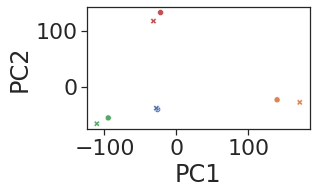

In [107]:
plt.figure(figsize=(4,2.25))
sns.scatterplot(data=pca_result, x='PC1',y='PC2', hue='Cell type', style='State',
               sizes=(500,500), legend=False)
plt.savefig('PCA.pdf', bbox_inches='tight')

# Annotate genes

In [66]:
id_to_name_tn = pd.read_csv('models/Meta Info/Naive_ID2Gene.csv')
id_to_name_th1 = pd.read_csv('models/Meta Info/Th1_ID2Gene.csv')
id_to_name_th2 = pd.read_csv('models/Meta Info/Th2_ID2Gene.csv')
id_to_name_th17 = pd.read_csv('models/Meta Info/Th17_ID2Gene.csv')

In [67]:
analysis.AnnotateGene(id_to_name_tn, tn_single_gene_ko)
analysis.AnnotateGene(id_to_name_th1, th1_single_gene_ko)
analysis.AnnotateGene(id_to_name_th2, th2_single_gene_ko)
analysis.AnnotateGene(id_to_name_th17, th17_single_gene_ko)

# Save results

Optimal Fluxes

In [61]:
pd.DataFrame({'CD4 T Subtype':['Naive', 'Th1', 'Th2', 'Th17'],
              'Host Biomass Optimal':optimized_flux_host,
              'Virus Production Optimal':optimized_flux_virus}).to_csv('Result/optimal_fluxes.csv')

Optimal vector

In [128]:
with pd.ExcelWriter('Result/Optimal_vector.xlsx') as writer:
    tn_hostX.to_excel(writer, sheet_name='Naive host optima')
    tn_virusX.to_excel(writer, sheet_name='Naive virus optima')
    th1_hostX.to_excel(writer, sheet_name='Th1 host optima')
    th1_virusX.to_excel(writer, sheet_name='Th1 host optima')
    th2_hostX.to_excel(writer, sheet_name='Th2 host optima')
    th2_virusX.to_excel(writer, sheet_name='Th2 virus optima')
    th17_hostX.to_excel(writer, sheet_name='Th17 host optima')
    th17_virusX.to_excel(writer, sheet_name='Th17 virus optima')

Single-gene KO

In [68]:
with pd.ExcelWriter('Result/single-gene_ko.xlsx') as writer:
    tn_single_gene_ko.to_excel(writer, sheet_name='Naive')
    th1_single_gene_ko.to_excel(writer, sheet_name='Th1')
    th2_single_gene_ko.to_excel(writer, sheet_name='Th2')
    th17_single_gene_ko.to_excel(writer, sheet_name='Th17')

Single-reaction KO

In [69]:
with pd.ExcelWriter('Result/single-reaction_ko.xlsx') as writer:
    tn_single_reaction_ko.to_excel(writer, sheet_name='Naive')
    th1_single_reaction_ko.to_excel(writer, sheet_name='Th1')
    th2_single_reaction_ko.to_excel(writer, sheet_name='Th2')
    th17_single_reaction_ko.to_excel(writer, sheet_name='Th17')

Altered_reactions

In [70]:
with pd.ExcelWriter('Result/Altered_reactions.xlsx') as writer:
    regulation_tn.to_excel(writer, sheet_name='Naive')
    regulation_th1.to_excel(writer, sheet_name='Th1')
    regulation_th2.to_excel(writer, sheet_name='Th2')
    regulation_th17.to_excel(writer, sheet_name='Th17')

Enforcement

In [79]:
with pd.ExcelWriter('Result/Enforcement.xlsx') as writer:
    enfvirus_tn.to_excel(writer, sheet_name='Naive')
    enfvirus_th1.to_excel(writer, sheet_name='Th1')
    enfvirus_th2.to_excel(writer, sheet_name='Th2')
    enfvirus_th17.to_excel(writer, sheet_name='Th17')